Probamos incluyendo de nuevo la columna Delay, pero pasándole primero una transformación logarítmica a aquellas columnas con una distribución asimétrica.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas para regresiones
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regresores
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Data/MeneosCompleto.csv", delimiter=";")

pd.set_option("display.precision", 7)

df.head(3)

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0


In [3]:
def limpieza_datos(df):
    #Limpieza de duplicados
    df.drop_duplicates()

    #Elimina las filas con valores NaN de las columnas que no son Clicks.
    lista_columnas = df.columns.to_list()
    lista_columnas.remove("Clicks")

    for columna in lista_columnas:
        lista_indices = df[df[columna].isna() == True].index.tolist()
        df = df.drop(index = lista_indices)
    
    # Creamos la columna delay que es el tiempo que transcurre entre que se envía el meneo y se publica
    df["Delay"] = df["Publicado"] - df["Enviado"]
    
    #Eliminación de columnas innecesarias
    df = df.drop(columns=["Medio", "Publicado", "Enviado", "Positivos", "Anonimos"], axis=1)
    
    # Separamos nuestro dataframe en uno de train, test y otro de predicción
    df_tt = df[df["Clicks"].isna() == False]

    df_pred = df[df["Clicks"].isna() == True]
    df_pred.to_csv("Data/Datos_Pred.csv", index=False)

    # # Eliminación de outliers
    # df_tt = df_tt[df_tt["Meneos"].between(50, 3000)]
    # df_tt = df_tt[df_tt["Negativos"] <= 13]
    # df_tt = df_tt[df_tt["Comentarios"].between(10, 150)]
    # df_tt = df_tt[df_tt["Karma"].between(230, 700)]
    # df_tt = df_tt[df_tt["Clicks"].between(263, 37946)]


    # Guardamos nuestro dataframe de train, test
    df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

    return(df_tt)

In [4]:
df_tt = limpieza_datos(df)

In [5]:
df_tt.head()

,Titular,URL,Meneos,Clicks,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,https://old.meneame.net/story/arresten-lideres...,81,111.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,3.0,39.0,460.0,1683.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,5.0,24.0,410.0,13713.0
4,Cuando Einstein llamó “fascistas” a los gobern...,https://old.meneame.net/story/cuando-einstein-...,260,415.0,2.0,17.0,461.0,26628.0


## OUTLIERS ##

In [6]:
def graficas_box(df_tt, feature, transform = None):
    if transform == None:
        return(px.histogram(df_tt[feature], marginal="box"))
    else:
        return(px.histogram(df_tt[feature].apply(transform), marginal="box"))

In [7]:
def outliers_log(feature):
    global df_tt
    stats = df_tt[feature].apply(np.log).describe()
    q1 = stats["25%"]
    q3 = stats["75%"]
    ric = q3 - q1

    lim_inf = q1 - 1.5*ric
    lim_sup = q3 + 1.5*ric

    df_tt[feature] = df_tt[feature].apply(np.log)
    return(df_tt[df_tt[feature].between(lim_inf, lim_sup)])

# Meneos #

In [ ]:
graficas_box(df_tt, "Meneos")

In [ ]:
graficas_box(df_tt, "Meneos", transform=np.log)

In [10]:
df_tt.shape

(193671, 8)

In [11]:
df_tt = outliers_log("Meneos")

In [12]:
df_tt.shape

(193045, 8)

# Negativos #

In [ ]:
graficas_box(df_tt, "Negativos")

In [ ]:
graficas_box(df_tt, "Negativos", transform = np.log)

In [15]:
df_tt = outliers_log("Negativos")

# Comentarios # 

In [ ]:
graficas_box(df_tt, "Comentarios")

In [ ]:
graficas_box(df_tt, "Comentarios", transform = np.log)

In [18]:
df_tt = outliers_log("Comentarios")

In [19]:
df_tt.shape

(149306, 8)

# Karma #

In [ ]:
graficas_box(df_tt, "Karma")

In [ ]:
graficas_box(df_tt, "Karma", transform = np.log)

In [22]:
df_tt = outliers_log("Karma")

In [23]:
df_tt.shape

(149079, 8)

## Delay ##

In [24]:
df_tt["Delay"]

0          7655.0
1         10093.0
2          1683.0
3         13713.0
4         26628.0
           ...   
193671     1502.0
193672    31884.0
193675    17777.0
193680    10532.0
193686     6423.0
Name: Delay, Length: 149079, dtype: float64

In [ ]:
graficas_box(df_tt, "Delay")

In [ ]:
graficas_box(df_tt, "Delay", transform=np.log)

In [27]:
df_tt = outliers_log("Delay")

## Clicks ##

In [ ]:
graficas_box(df_tt, "Clicks")

In [ ]:
graficas_box(df_tt, "Clicks", transform = np.log)

In [30]:
df_tt = outliers_log("Clicks")

In [31]:
df_tt.shape

(148913, 8)

In [32]:
df_tt["Negativos"].value_counts()

Negativos
0.0000000    32774
0.6931472    24547
1.0986123    18583
1.3862944    13901
1.6094379    10649
             ...  
4.3944492       12
4.4188406       10
4.4773368        8
4.4543473        8
4.4426513        5
Name: count, Length: 88, dtype: int64

## ***VISUALIZACIONES***

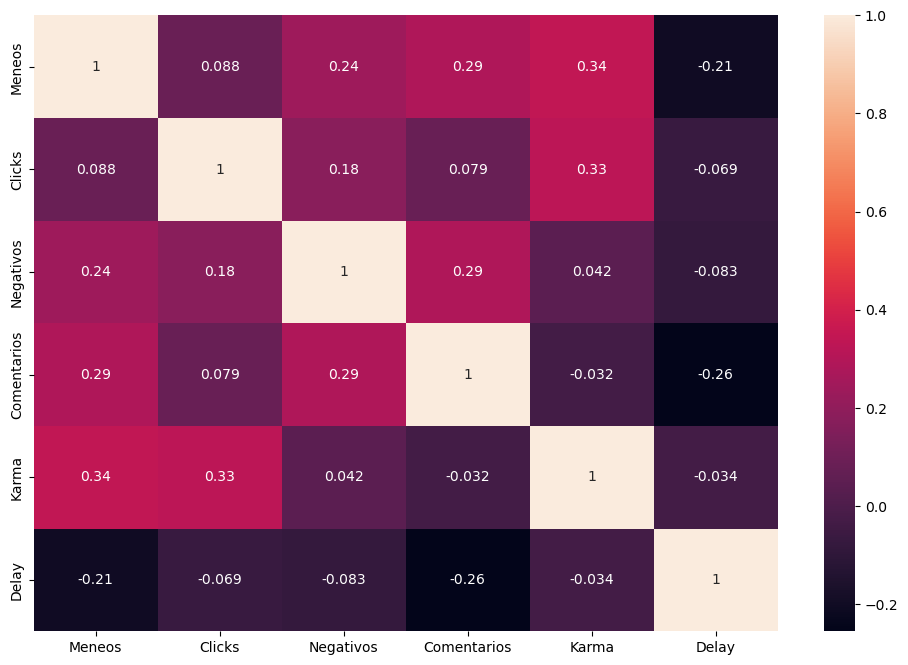

In [33]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_tt._get_numeric_data().corr(), annot = True)
plt.show()

## PREPROCESAMIENTO ##

In [34]:
df_tt.head(3)

,Titular,URL,Meneos,Clicks,Negativos,Comentarios,Karma,Delay
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,4.2904594,5.8171112,1.0986123,2.9957323,6.0890449,9.2195974
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,4.8121844,7.1507015,1.0986123,3.6635616,6.1312265,7.4283332
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,4.7621739,7.1356873,1.6094379,3.1780538,6.0161572,9.5260996


In [35]:
modelos = [LinearRegression(),
            KNeighborsRegressor(),
            # RadiusNeighborsRegressor(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            SVR(),
            AdaBoostRegressor(),
            GradientBoostingRegressor()]

In [36]:
# train, test split

X = df_tt.iloc[:, 2:].drop(["Clicks"], axis = 1)
y = df_tt[["Clicks"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

datos_modelos = list()

for model in modelos:

    model.fit(X_train, y_train.ravel())
    yhat = model.predict(X_test)

    y_test_inv = np.exp(y_scaler.inverse_transform(y_test.reshape(-1, 1)))
    yhat_inv = np.exp(y_scaler.inverse_transform(yhat.reshape(-1, 1)))

    #Metricas
    mae = mean_absolute_error(y_test_inv, yhat_inv)
    mse = mean_squared_error(y_test_inv, yhat_inv)
    r2 = r2_score(y_test_inv, yhat_inv)

    datos_modelos.append([str(model).strip("()"), model, mae, mse, r2])

df_modelo = pd.DataFrame(data = datos_modelos, columns = ["name", "model", "mae", "mse", "r2"])

df_modelo.sort_values("r2", ascending = False)



,name,model,mae,mse,r2
4,SVR,SVR(),2915.2939863,2.2260210e+07,0.1184232
6,GradientBoostingRegressor,([DecisionTreeRegressor(criterion='friedman_ms...,2948.8330984,2.2894612e+07,0.0932988
3,RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",2985.1456339,2.2900096e+07,0.0930816
0,LinearRegression,LinearRegression(),3042.3327657,2.4114065e+07,0.0450045
1,KNeighborsRegressor,KNeighborsRegressor(),3148.3232138,2.4312646e+07,0.0371400
5,AdaBoostRegressor,"(DecisionTreeRegressor(max_depth=3, random_sta...",3050.2236103,2.4566115e+07,0.0271018
2,DecisionTreeRegressor,DecisionTreeRegressor(),4329.3565121,4.2497065e+07,-0.6830222
